In [1]:
from google.colab import files
files.upload()

Saving Flight_Schedule.csv to Flight_Schedule.csv


{'Flight_Schedule.csv': b'flightNumber,airline,origin,destination,dayOfWeek,scheduledDepartureTime,scheduledArrivalTime,validFrom,validTo\r\n425,GoAir,Delhi,Hyderabad,"Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday",05:45,,28-10-2018,30-03-2019\r\n423,GoAir,Delhi,Hyderabad,Saturday,07:30,,28-10-2018,28-10-2018\r\n423,GoAir,Delhi,Hyderabad,Friday,07:30,,03-11-2018,01-12-2018\r\n423,GoAir,Delhi,Hyderabad,Friday,07:30,,02-02-2019,30-03-2019\r\n423,GoAir,Delhi,Hyderabad,"Sunday,Monday,Tuesday,Wednesday,Thursday,Saturday",07:30,,29-10-2018,30-11-2018\r\n423,GoAir,Delhi,Hyderabad,"Sunday,Monday,Tuesday,Wednesday,Thursday,Saturday",07:30,,01-02-2019,29-03-2019\r\n423,GoAir,Delhi,Hyderabad,"Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday",07:30,,02-12-2018,31-01-2019\r\n422,GoAir,Delhi,Hyderabad,"Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday",20:55,,28-10-2018,30-03-2019\r\n559,GoAir,Lucknow,Hyderabad,"Sunday,Tuesday,Wednesday,Thursday,Friday,Saturday",15:45,17:45

In [2]:


import pandas as pd
import numpy as np

df = pd.read_csv("Flight_Schedule.csv")

print(df.shape)
print(df.head())
print(df.columns)


(34325, 9)
  flightNumber airline origin destination  \
0          425   GoAir  Delhi   Hyderabad   
1          423   GoAir  Delhi   Hyderabad   
2          423   GoAir  Delhi   Hyderabad   
3          423   GoAir  Delhi   Hyderabad   
4          423   GoAir  Delhi   Hyderabad   

                                           dayOfWeek scheduledDepartureTime  \
0  Sunday,Monday,Tuesday,Wednesday,Thursday,Frida...                  05:45   
1                                           Saturday                  07:30   
2                                             Friday                  07:30   
3                                             Friday                  07:30   
4  Sunday,Monday,Tuesday,Wednesday,Thursday,Saturday                  07:30   

  scheduledArrivalTime   validFrom     validTo  
0                  NaN  28-10-2018  30-03-2019  
1                  NaN  28-10-2018  28-10-2018  
2                  NaN  03-11-2018  01-12-2018  
3                  NaN  02-02-2019  30-03-2019 

In [3]:

df['validFrom'] = pd.to_datetime(df['validFrom'], dayfirst=True, errors='coerce')
df['validTo']   = pd.to_datetime(df['validTo'], dayfirst=True, errors='coerce')

dep_time_parsed = pd.to_datetime(df['scheduledDepartureTime'], format='%H:%M', errors='coerce')
df['dep_hour'] = dep_time_parsed.dt.hour

arr_time_parsed = pd.to_datetime(df['scheduledArrivalTime'], format='%H:%M', errors='coerce')
df['arr_hour'] = arr_time_parsed.dt.hour

df['route'] = df['origin'].astype(str) + " → " + df['destination'].astype(str)

df['dayOfWeekList'] = df['dayOfWeek'].astype(str).str.split(',')
df = df.explode('dayOfWeekList')
df['dayOfWeekList'] = df['dayOfWeekList'].str.strip()

print(df.head())


  flightNumber airline origin destination  \
0          425   GoAir  Delhi   Hyderabad   
0          425   GoAir  Delhi   Hyderabad   
0          425   GoAir  Delhi   Hyderabad   
0          425   GoAir  Delhi   Hyderabad   
0          425   GoAir  Delhi   Hyderabad   

                                           dayOfWeek scheduledDepartureTime  \
0  Sunday,Monday,Tuesday,Wednesday,Thursday,Frida...                  05:45   
0  Sunday,Monday,Tuesday,Wednesday,Thursday,Frida...                  05:45   
0  Sunday,Monday,Tuesday,Wednesday,Thursday,Frida...                  05:45   
0  Sunday,Monday,Tuesday,Wednesday,Thursday,Frida...                  05:45   
0  Sunday,Monday,Tuesday,Wednesday,Thursday,Frida...                  05:45   

  scheduledArrivalTime  validFrom    validTo  dep_hour  arr_hour  \
0                  NaN 2018-10-28 2019-03-30       5.0       NaN   
0                  NaN 2018-10-28 2019-03-30       5.0       NaN   
0                  NaN 2018-10-28 2019-03-30      

In [4]:
flights_per_airline = (
    df.groupby('airline')['flightNumber']
      .nunique()
      .sort_values(ascending=False)
)

print("Flights per airline:")
print(flights_per_airline)


Flights per airline:
airline
TestIndigo       1847
SpiceJet         1042
GoAir             679
Jet Airways       510
Air India         447
AirAsia India     368
Vistara           292
TruJet            122
Jetlite            67
Name: flightNumber, dtype: int64


In [5]:
top_routes = df['route'].value_counts().head(10)
print("Top 10 routes by number of scheduled flights:")
print(top_routes)


Top 10 routes by number of scheduled flights:
route
Mumbai → Delhi           2829
Delhi → Mumbai           2659
Bengaluru → Delhi        1964
Delhi → Bengaluru        1955
Mumbai → Bengaluru       1761
Delhi → Kolkata          1556
Kolkata → Delhi          1527
Bengaluru → Mumbai       1527
Hyderabad → Delhi        1434
Hyderabad → Bengaluru    1364
Name: count, dtype: int64


In [6]:
flights_by_day = (
    df.groupby('dayOfWeekList')['flightNumber']
      .nunique()
      .sort_values(ascending=False)
)

print("Flights per day of week:")
print(flights_by_day)


Flights per day of week:
dayOfWeekList
Saturday     2679
Friday       2676
Sunday       2672
Wednesday    2659
Thursday     2659
Tuesday      2650
Monday       2616
Name: flightNumber, dtype: int64


In [7]:
flights_by_hour = (
    df.groupby('dep_hour')['flightNumber']
      .nunique()
      .sort_values(ascending=False)
)

print("Flights per departure hour:")
print(flights_by_hour)


Flights per departure hour:
dep_hour
13.0    566
11.0    563
9.0     531
15.0    526
16.0    526
8.0     516
12.0    515
10.0    505
17.0    495
14.0    488
18.0    488
19.0    477
7.0     470
6.0     432
20.0    421
21.0    345
5.0     329
22.0    209
4.0     151
23.0    137
0.0      90
2.0      69
3.0      56
1.0      51
Name: flightNumber, dtype: int64


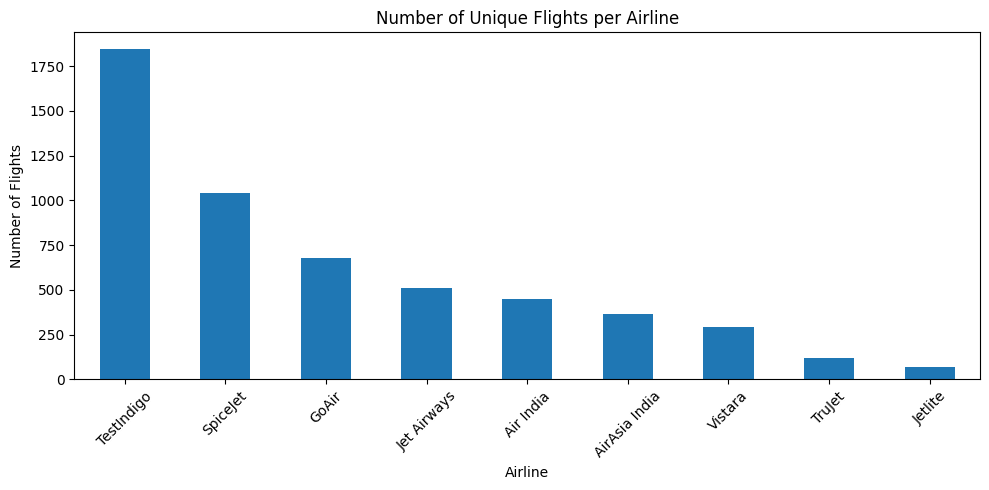

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
flights_per_airline.head(10).plot(kind='bar')
plt.title("Number of Unique Flights per Airline")
plt.xlabel("Airline")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()







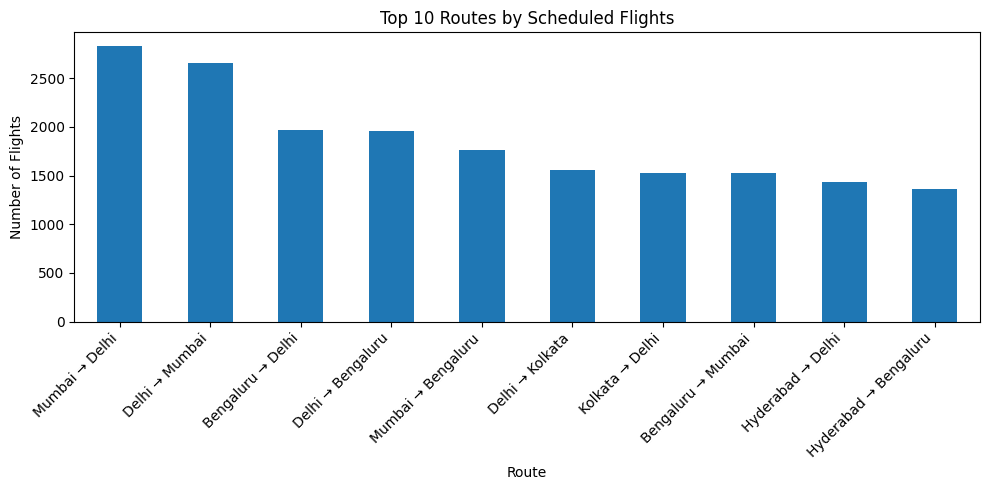

In [12]:

plt.figure(figsize=(10,5))
top_routes.plot(kind='bar')
plt.title("Top 10 Routes by Scheduled Flights")
plt.xlabel("Route")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




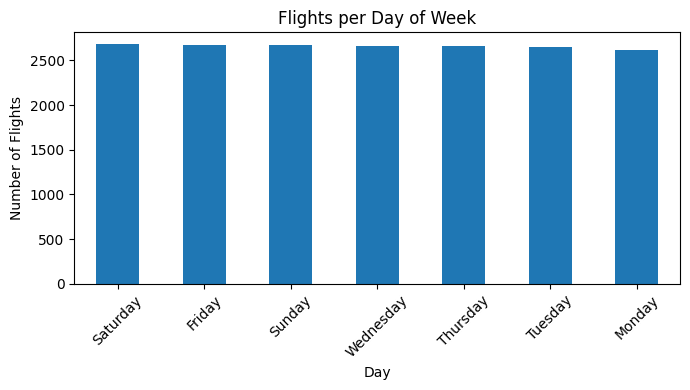

In [13]:

plt.figure(figsize=(7,4))
flights_by_day.plot(kind='bar')
plt.title("Flights per Day of Week")
plt.xlabel("Day")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



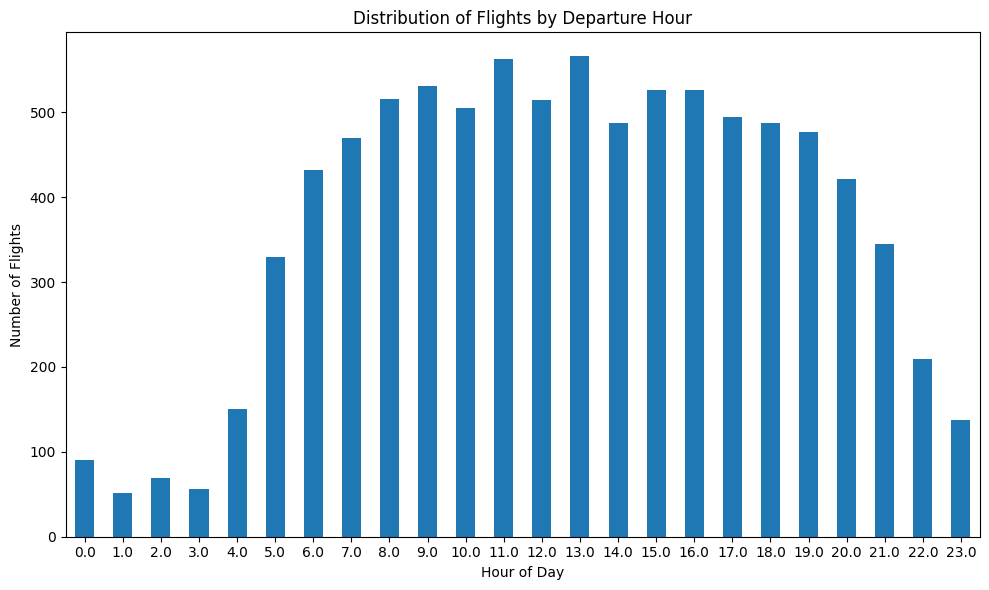

In [17]:
plt.figure(figsize=(10,6))
flights_by_hour.sort_index().plot(kind='bar')
plt.title("Distribution of Flights by Departure Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Flights")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [18]:
flights_per_airline.to_csv("flights_per_airline.csv", header=['num_flights'])
top_routes.to_csv("top_routes.csv", header=['num_flights'])
flights_by_day.to_csv("flights_by_day.csv", header=['num_flights'])
flights_by_hour.to_csv("flights_by_hour.csv", header=['num_flights'])

print("Aggregated CSVs saved — import them into Tableau/Power BI/Google Sheets for dashboards.")


Aggregated CSVs saved — import them into Tableau/Power BI/Google Sheets for dashboards.


In [23]:
from google.colab import files
files.download ("top_routes.csv")
files.download("flights_by_day.csv")
files.download ("flights_by_hour.csv")
files.download("flights_per_airline.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
from sqlalchemy import create_engine

engine = create_engine("sqlite:///flights.db", echo=False)

df.to_sql("flight_schedule", engine, if_exists="replace", index=False)


165687

In [20]:
query_airline = """
SELECT
    airline,
    COUNT(DISTINCT flightNumber) AS num_flights
FROM flight_schedule
GROUP BY airline
ORDER BY num_flights DESC;
"""

airline_sql = pd.read_sql(query_airline, engine)
print(airline_sql)


         airline  num_flights
0     TestIndigo         1847
1       SpiceJet         1042
2          GoAir          679
3    Jet Airways          510
4      Air India          447
5  AirAsia India          368
6        Vistara          292
7           None          286
8         TruJet          122
9        Jetlite           67


In [21]:
query_routes = """
SELECT
    origin,
    destination,
    COUNT(*) AS num_schedules
FROM flight_schedule
WHERE dep_hour BETWEEN 6 AND 12   -- morning flights
GROUP BY origin, destination
ORDER BY num_schedules DESC
LIMIT 10;
"""

routes_sql = pd.read_sql(query_routes, engine)
print(routes_sql)


      origin destination  num_schedules
0      Delhi      Mumbai            817
1     Mumbai       Delhi            801
2  Bengaluru       Delhi            486
3      Delhi   Bengaluru            448
4     Mumbai   Bengaluru            435
5  Bengaluru      Mumbai            429
6      Delhi    Srinagar            419
7  Hyderabad   Bengaluru            380
8      Delhi       Patna            360
9    Kolkata       Delhi            356
